# Bytes

All things are made of bytes

In [10]:
import sys
import collections
import matplotlib.pyplot as plt


def byte_distribution(filename):
    """
    Calculates and displays the byte distribution in a file.

    Args:
        filename (str): The path to the file to analyze.
    """

    try:
        with open(filename, 'rb') as f:  # Open in binary read mode
            data = f.read()
    except FileNotFoundError:
        print(f"Error: File not found: {filename}")
        return
    except Exception as e:
        print(f"Error: Could not read file: {e}")
        return

    byte_counts = collections.Counter(data)  # Count occurrences of each byte

    total_bytes = len(data)
    print(f"Total bytes in file: {total_bytes}")


    # Display statistics (optional, but useful)
    print("\nByte Distribution Statistics:")
    for byte_value, count in byte_counts.most_common(10): # Print the top 10 most common bytes
      percentage = (count / total_bytes) * 100
      print(f"  Byte 0x{byte_value:02X}: Count = {count}, Percentage = {percentage:.2f}%")

    # Plot the distribution (using matplotlib)
    plot_byte_distribution(byte_counts, filename)


def plot_byte_distribution(byte_counts, filename):
    """
    Plots the byte distribution using matplotlib.

    Args:
        byte_counts (collections.Counter):  A Counter object containing byte counts.
        filename (str): The filename (used for the plot title).
    """

    # Prepare data for plotting
    byte_values = list(byte_counts.keys())
    counts = list(byte_counts.values())

    # Create the plot
    plt.figure(figsize=(12, 6))  # Adjust figure size for better readability

    # Use a bar chart for clear visualization
    plt.bar(byte_values, counts, color='skyblue')

    plt.xlabel("Byte Value (Hex)")
    plt.ylabel("Frequency")
    plt.title(f"Byte Distribution in '{filename}'")
    plt.xticks(range(0, 256, 16), [f"{i:02X}" for i in range(0, 256, 16)], rotation=45)  # Hex labels
    plt.xlim(-1, 256)  # Set x-axis limits
    plt.grid(axis='y', alpha=0.5)  # Add a subtle grid

    plt.tight_layout()  # Adjust layout to prevent labels from overlapping

    plt.show()


Total bytes in file: 136658

Byte Distribution Statistics:
  Byte 0x11: Count = 957, Percentage = 0.70%
  Byte 0x44: Count = 949, Percentage = 0.69%
  Byte 0x22: Count = 769, Percentage = 0.56%
  Byte 0x88: Count = 765, Percentage = 0.56%
  Byte 0xEF: Count = 719, Percentage = 0.53%
  Byte 0xDF: Count = 717, Percentage = 0.52%
  Byte 0xE7: Count = 706, Percentage = 0.52%
  Byte 0xCF: Count = 688, Percentage = 0.50%
  Byte 0x00: Count = 671, Percentage = 0.49%
  Byte 0x21: Count = 658, Percentage = 0.48%


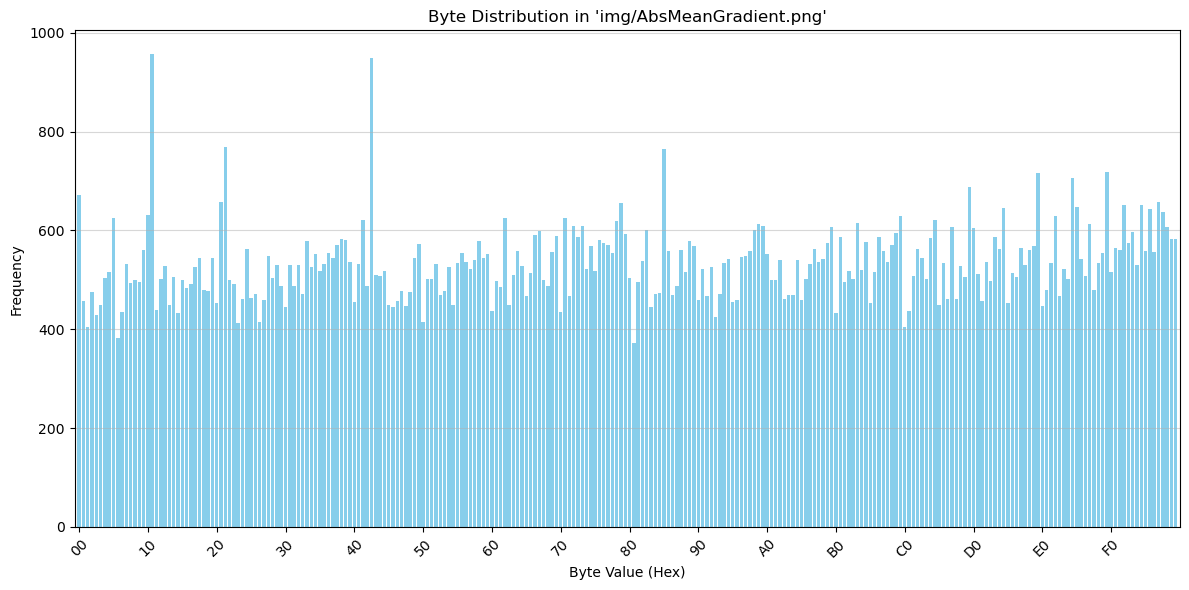

In [14]:
byte_distribution('img/AbsMeanGradient.png')

Total bytes in file: 67972

Byte Distribution Statistics:
  Byte 0x44: Count = 657, Percentage = 0.97%
  Byte 0x11: Count = 648, Percentage = 0.95%
  Byte 0x00: Count = 509, Percentage = 0.75%
  Byte 0x88: Count = 494, Percentage = 0.73%
  Byte 0xCE: Count = 465, Percentage = 0.68%
  Byte 0x22: Count = 459, Percentage = 0.68%
  Byte 0x9C: Count = 430, Percentage = 0.63%
  Byte 0x18: Count = 418, Percentage = 0.61%
  Byte 0xB3: Count = 409, Percentage = 0.60%
  Byte 0x67: Count = 404, Percentage = 0.59%


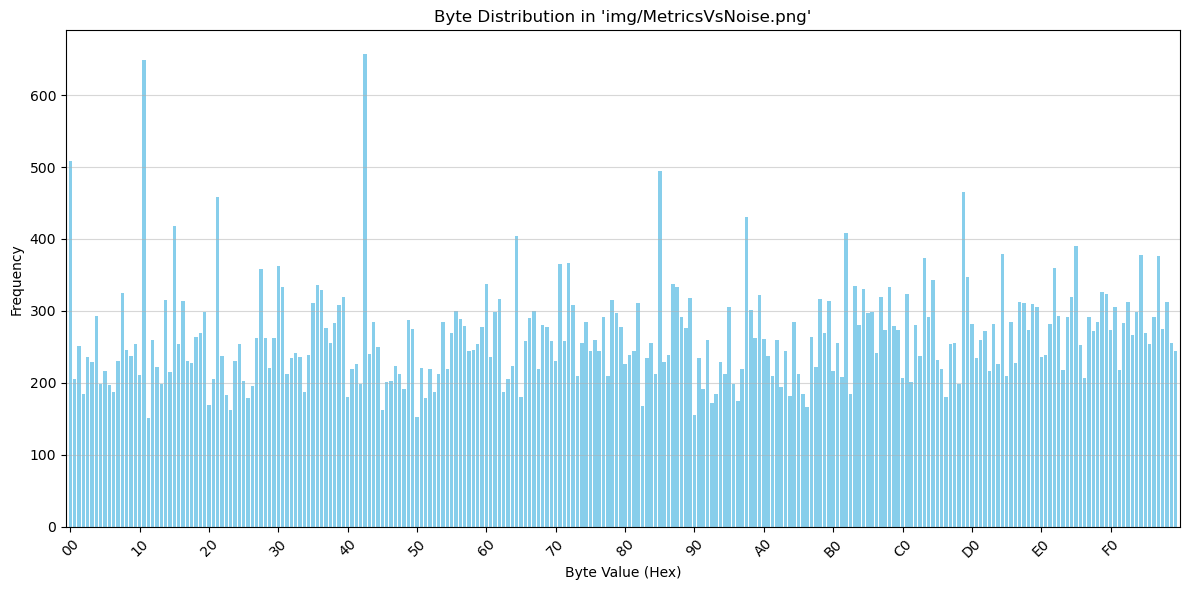

In [16]:
byte_distribution('img/MetricsVsNoise.png')

Total bytes in file: 29799560

Byte Distribution Statistics:
  Byte 0x00: Count = 3807859, Percentage = 12.78%
  Byte 0x48: Count = 947118, Percentage = 3.18%
  Byte 0x65: Count = 915241, Percentage = 3.07%
  Byte 0x45: Count = 882168, Percentage = 2.96%
  Byte 0xFF: Count = 748518, Percentage = 2.51%
  Byte 0x74: Count = 745041, Percentage = 2.50%
  Byte 0x5F: Count = 744442, Percentage = 2.50%
  Byte 0x69: Count = 700054, Percentage = 2.35%
  Byte 0x72: Count = 603863, Percentage = 2.03%
  Byte 0x61: Count = 601521, Percentage = 2.02%


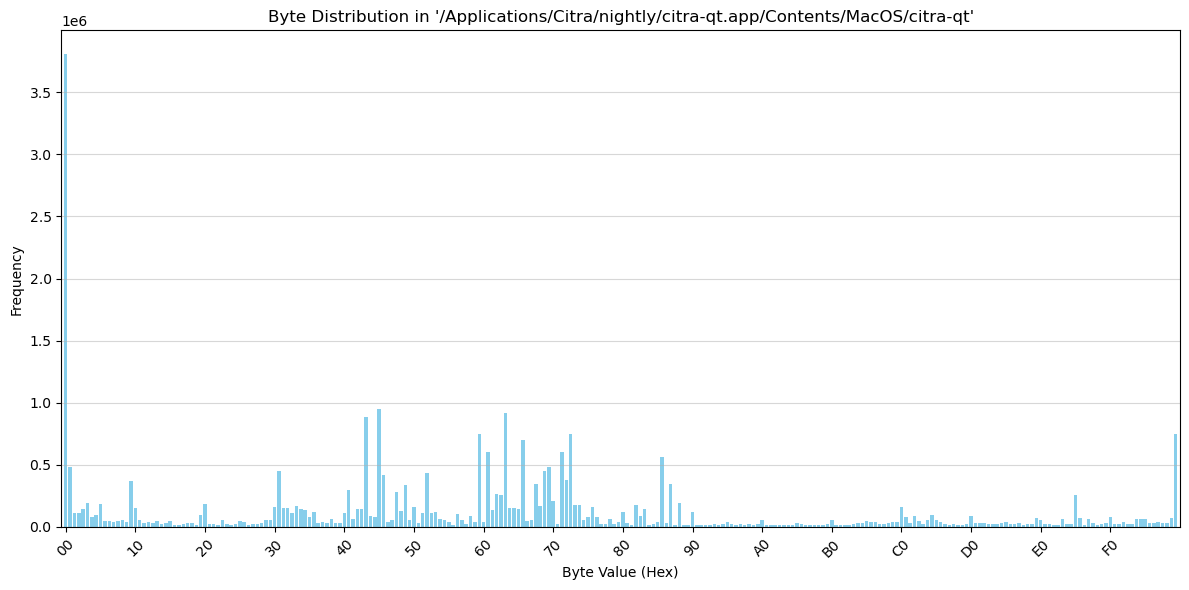

In [19]:
byte_distribution('/Applications/Citra/nightly/citra-qt.app/Contents/MacOS/citra-qt')

In [44]:
import sys
import collections
import numpy as np
import matplotlib.pyplot as plt

def byte_distribution_heatmap(filename):
    """
    Calculates and displays the byte distribution in a file as a 16x16 heatmap.

    Args:
        filename (str): The path to the file to analyze.
    """

    try:
        with open(filename, 'rb') as f:
            data = f.read()
    except FileNotFoundError:
        print(f"Error: File not found: {filename}")
        return
    except Exception as e:
        print(f"Error: Could not read file: {e}")
        return

    byte_counts = collections.Counter(data)
    total_bytes = len(data)
    print(f"Total bytes in file: {total_bytes}")

    # Create a 16x16 matrix representing the byte distribution
    heatmap_data = np.zeros((16, 16))
    for byte_value, count in byte_counts.items():
        row = byte_value // 16
        col = byte_value % 16
        heatmap_data[row, col] = count

    # Normalize the heatmap data (optional, but often helpful for visualization)
    heatmap_data /= total_bytes  # Convert counts to frequencies

    # Plot the heatmap using matplotlib
    plot_heatmap(heatmap_data, filename)


def plot_heatmap(heatmap_data, filename):
    """
    Plots the byte distribution heatmap using matplotlib.

    Args:
        heatmap_data (np.ndarray): A 16x16 NumPy array containing the byte distribution.
        filename (str): The filename (used for the plot title).
    """

    plt.figure(figsize=(8, 8))  # Adjust figure size

    # Use imshow to create the heatmap
    plt.imshow(heatmap_data, cmap='cividis', interpolation='nearest')  # 'viridis' is a good default colormap

    plt.title(f"Byte Distribution Heatmap in '{filename}'")
    plt.xlabel("Byte Value (LSB)") # LSB - Least Significant Byte (column within row)
    plt.ylabel("Byte Value (MSB)") # MSB - Most Significant Byte (row)

    # Set tick locations and labels for the axes (optional but improves readability)
    plt.xticks(np.arange(16), [f"{i:X}" for i in range(16)])  # Hexadecimal labels for columns
    plt.yticks(np.arange(16), [f"{i:X}" for i in range(16)])  # Hexadecimal labels for rows

    plt.colorbar(label="Byte Frequency")  # Add a colorbar

    plt.tight_layout() #prevent labels from overlapping

    plt.show()

Total bytes in file: 1129053


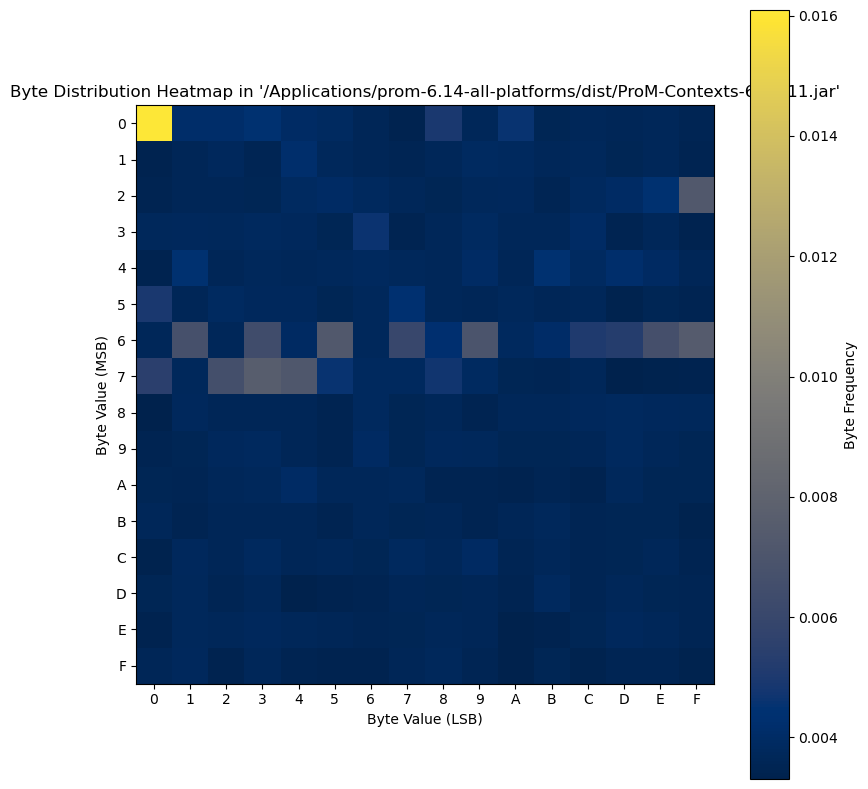

In [45]:
byte_distribution_heatmap('/Applications/prom-6.14-all-platforms/dist/ProM-Contexts-6.14.11.jar')